running ...
640
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]]


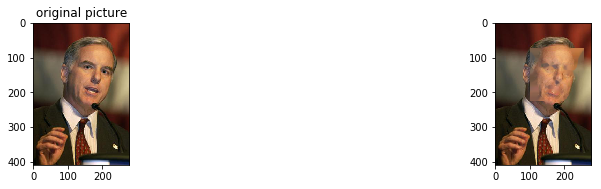

24
[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]]


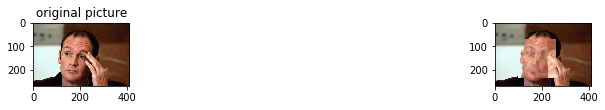

990
[[0 0 0 ..., 0 1 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


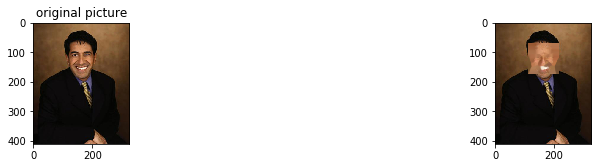

342
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


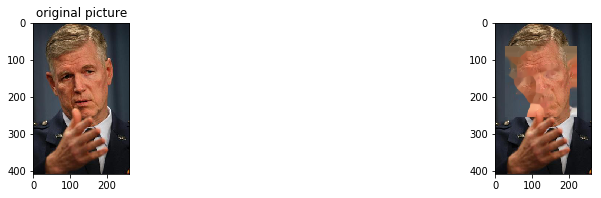

463
155
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


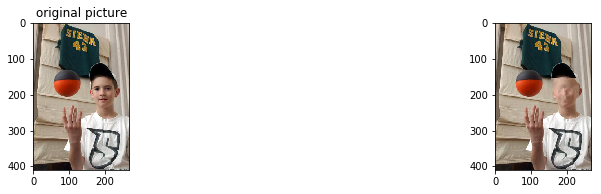

917
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


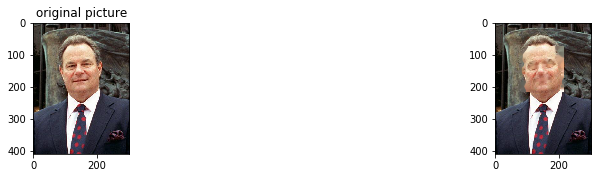

In [ ]:
import cv2,os
import numpy as np
from PIL import Image
import pickle
import matplotlib
import matplotlib.pyplot as plt
import random

print("running ...")

recognizer = cv2.face.LBPHFaceRecognizer_create()
cascadePath = "Classifiers/face.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
path = 'dataset2/originalPics/2003/04/03/big/'
def get_images_and_labels(path):
     lower = np.array([0, 48, 80], dtype = "uint8")
     upper = np.array([20, 255, 255], dtype = "uint8")

     image_paths = [os.path.join(path, f) for f in os.listdir(path)]
     # images will contains face images
     images = []
     # labels will contains the label that is assigned to the image
     labels = []
     for image_path in image_paths:
         # Read the image and convert to grayscale
         image_pil = Image.open(image_path)
         # Convert the image format into numpy array
         image = np.array(image_pil, 'uint8')
         
         # Get the label of the image
         nbr = random.randint(1,1000)#os.path.split(image_path)[1].split(".")[0].replace("face-", "")
         #nbr=int(''.join(str(ord(c)) for c in nbr))
         print nbr
         # Detect the face in the image
         faces = faceCascade.detectMultiScale(image,            
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE)
         # If face is detected, append the face to images and the label to labels
         for (x, y, w, h) in faces:
             maskedImage = image[:]
             images.append(image[y: y + h, x: x + w])
             labels.append(nbr)
             fig = plt.figure(figsize=(10, 30))
             plt.subplot(1, 5, 1)
             #cv2.imshow("Adding faces to traning set...", image)
             # Show the original image
             plt.title("original picture")
             plt.imshow(image,cmap='gray')
  
             
             # Show the detected face in image            
             #cv2.imshow('--',image[y: y + h, x: x + w])

             #plt.subplot(1, 4, 2)
             #plt.title("face detected")
             #plt.imshow(image[y: y + h, x: x + w],cmap='gray')
             #plt.show()
                
             face_region = image[y: y + h, x: x + w]
             converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
             #skinMask = cv2.inRange(image, lower, upper)
             # apply a series of erosions and dilations to the mask
             # using an elliptical kernel
             #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
             #skinMask = cv2.erode(skinMask, kernel, iterations = 2)
             #skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
             # blur the mask to help remove noise, then apply the
             # mask to the frame
             #skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
             #skin = cv2.bitwise_and(converted, converted, mask = skinMask)
             #cv2.imshow("Face", np.hstack([converted, skin]))
             
             
             #plt.subplot(1, 5, 3)
             #plt.title("mask") 
             #plt.imshow(skinMask)

  
             #plt.subplot(1, 5, 4)                
             #plt.title("masked image")  
             #plt.imshow(skin)
 
             plt.subplot(1, 5, 5)
             #resImage = cv2.inpaint(image,skinMask,8,cv2.INPAINT_NS)
             maskedImage[y: y + h, x: x + w] = get_inpainted(face_region)
             #resImage = cv2.add(image,skinMask)
             plt.imshow(maskedImage)
             plt.show()
                
                
             cv2.waitKey(10)
     # return the images list and labels list
     return images, labels

def get_inpainted(img):
    gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gs, 70, 1, cv2.THRESH_BINARY)
    print(thresh)
    mask_features = 1 - thresh #1 for the dark pixels, 0 everywhere else
    #enlarge the mask a little bit...
    mask_features = cv2.dilate(mask_features, np.ones((8, 8), np.uint8))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    skinMask = mask_features
    #skinMask = cv2.erode(skinMask, kernel, iterations = 5)
    #skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
    return cv2.inpaint(img, skinMask, 8, cv2.INPAINT_NS)    
    

images, labels = get_images_and_labels(path)
#cv2.imshow('test',images[0])
cv2.waitKey(1)

#recognizer.train(images, np.array(labels))
#recognizer.write('trainer/trainer.yml')
cv2.destroyAllWindows()